
# Feature Engineering Pipeline
 
This notebook demonstrates:
1. Customer transaction aggregation
2. Time-based feature extraction
3. Feature preprocessing



In [2]:
%load_ext autoreload

In [48]:
%autoreload 2

In [49]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys
sys.path.append("../scripts/")
from load_data import read_csv_file
import eda_functions as eda
from feature_engineer import Aggregator, TimeFeatures

In [50]:
# Load data
path = '../data/raw/xente_data.csv'
data =read_csv_file(path)
df = data.get("data")
print(f"Raw data shape: {df.shape}")
df.head()

Raw data shape: (95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



## 1. Customer Transaction Aggregation

In [51]:
# Initialize and apply aggregator
aggregator = Aggregator(customer_id='CustomerId')
df_agg = aggregator.transform(df)

# Display aggregated features
print("\nAggregated Features:")
print(f"Unique customers: {df_agg['CustomerId'].nunique()}")
df_agg.head()



Aggregated Features:
Unique customers: 3742


,CustomerId,TotalAmount,AvgAmount,TransactionCount,StdAmount,FirstTransaction,LastTransaction
0,CustomerId_1,-10000.0,-10000.000000,1,NaN,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00
1,CustomerId_10,-10000.0,-10000.000000,1,NaN,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00
3,CustomerId_1002,4225.0,384.090909,11,560.498966,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00


## 2. Time-based Feature Extraction

In [52]:
# Initialize and apply time feature extractor
time_processor = TimeFeatures()
df_time = time_processor.transform(df)

# Show time features
print("\nTime Features Added:")
print(df_time[['TransactionId', 'TransactionStartTime', 'TransactionHour', 'TransactionDay']].head())




Time Features Added:
         TransactionId      TransactionStartTime  TransactionHour  \
0  TransactionId_76871 2018-11-15 02:18:49+00:00                2   
1  TransactionId_73770 2018-11-15 02:19:08+00:00                2   
2  TransactionId_26203 2018-11-15 02:44:21+00:00                2   
3    TransactionId_380 2018-11-15 03:32:55+00:00                3   
4  TransactionId_28195 2018-11-15 03:34:21+00:00                3   

   TransactionDay  
0              15  
1              15  
2              15  
3              15  
4              15  


## 3. Feature Preprocessing Pipeline

In [53]:
from sklearn.pipeline import Pipeline
from feature_engineer import Aggregator

# Create validated pipeline
preprocessor = Pipeline([
    ('aggregator', Aggregator(customer_id='CustomerId'))
])

# Proper sklearn-compatible transformation
transformed_df = preprocessor.fit_transform(df)

# Verify features
print("Available columns:", transformed_df.columns.tolist())

# Final processed data
print("\nFinal Processed Data Shape:", transformed_df.shape)
transformed_df.head()

Available columns: ['CustomerId', 'TotalAmount', 'AvgAmount', 'TransactionCount', 'StdAmount', 'FirstTransaction', 'LastTransaction']

Final Processed Data Shape: (3742, 7)


,CustomerId,TotalAmount,AvgAmount,TransactionCount,StdAmount,FirstTransaction,LastTransaction
0,CustomerId_1,-10000.0,-10000.000000,1,NaN,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00
1,CustomerId_10,-10000.0,-10000.000000,1,NaN,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00
3,CustomerId_1002,4225.0,384.090909,11,560.498966,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00


## 4. Feature Analysis

Available columns: ['CustomerId', 'TotalAmount', 'AvgAmount', 'TransactionCount', 'StdAmount', 'FirstTransaction', 'LastTransaction']


C:\Users\Tsebaot\AppData\Local\Temp\ipykernel_13932\332648095.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  transformed_df['TransactionMonth'] = pd.to_datetime(transformed_df['FirstTransaction']).dt.to_period('M')


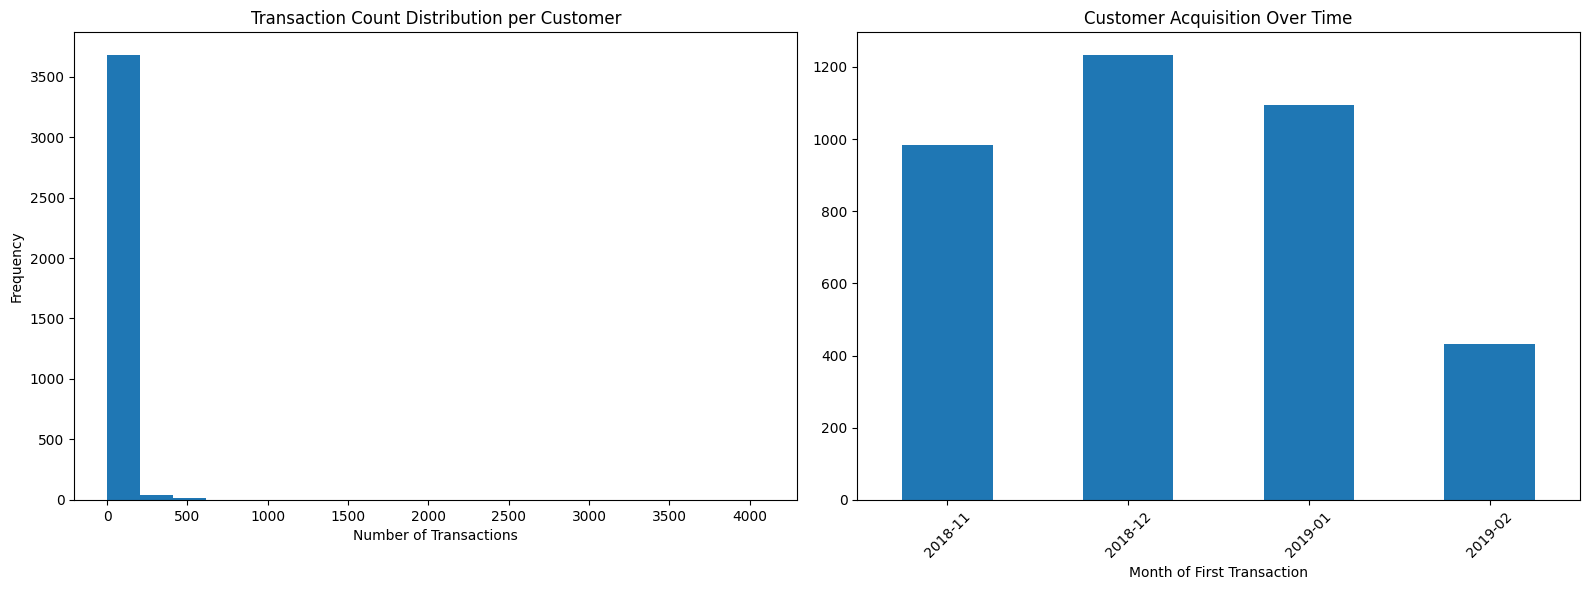

In [54]:
# Analyze aggregated features
print("Available columns:", transformed_df.columns.tolist())
transformed_df.describe().T.style.background_gradient(cmap='Blues')

# Plot meaningful transaction patterns
plt.figure(figsize=(16, 6))

# 1. Transaction Frequency Analysis
plt.subplot(1, 2, 1)
transformed_df['TransactionCount'].plot(
    kind='hist', 
    bins=20,
    title='Transaction Count Distribution per Customer'
)
plt.xlabel('Number of Transactions')

# 2. Customer Tenure Analysis
transformed_df['TransactionMonth'] = pd.to_datetime(transformed_df['FirstTransaction']).dt.to_period('M')
plt.subplot(1, 2, 2)
transformed_df['TransactionMonth'].value_counts().sort_index().plot(
    kind='bar', 
    title='Customer Acquisition Over Time'
)
plt.xlabel('Month of First Transaction')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

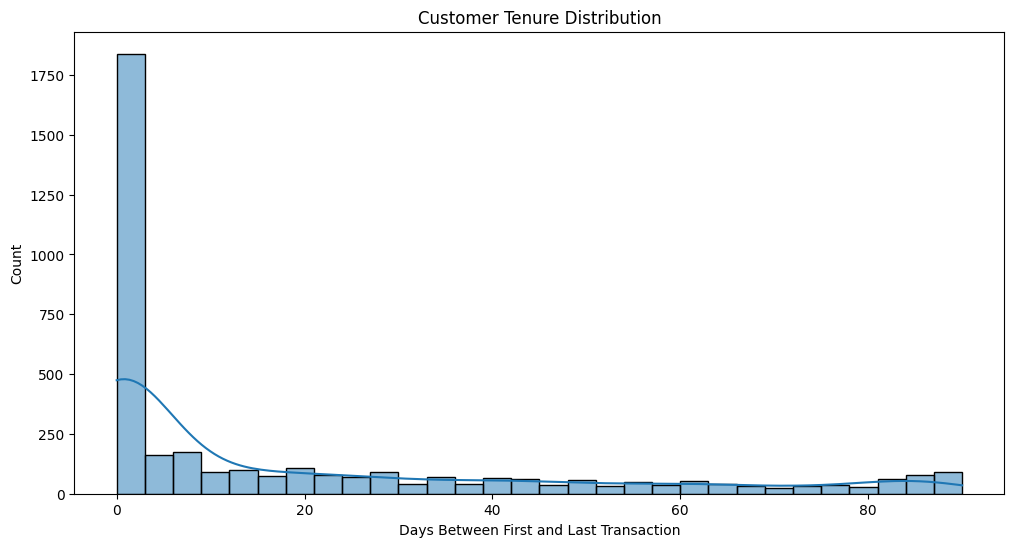

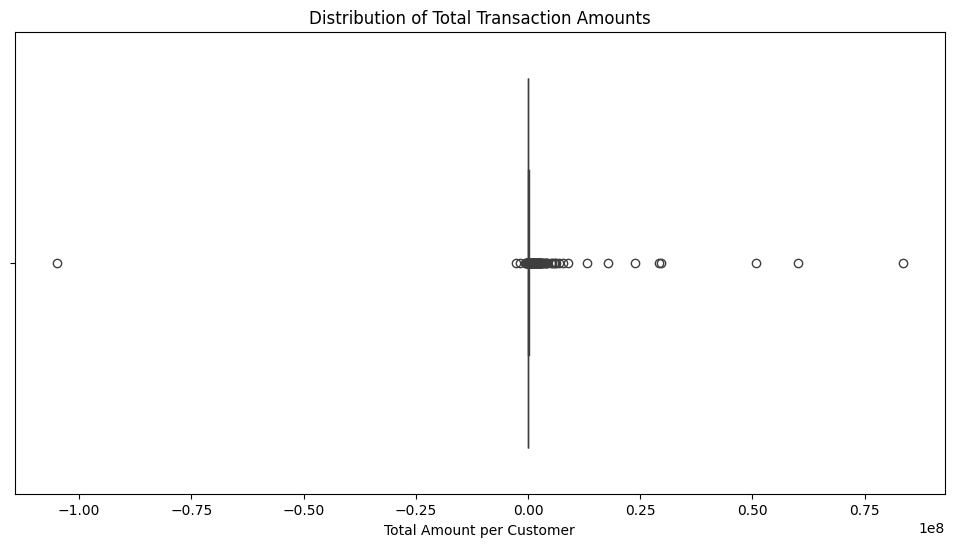

In [55]:
# Customer Tenure Analysis
transformed_df['DaysActive'] = (pd.to_datetime(transformed_df['LastTransaction']) - 
                               pd.to_datetime(transformed_df['FirstTransaction'])).dt.days

plt.figure(figsize=(12, 6))
sns.histplot(transformed_df['DaysActive'], bins=30, kde=True)
plt.title('Customer Tenure Distribution')
plt.xlabel('Days Between First and Last Transaction')
plt.show()

# Monetary Value Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x=transformed_df['TotalAmount'])
plt.title('Distribution of Total Transaction Amounts')
plt.xlabel('Total Amount per Customer')
plt.show()

## 5. Save Processed Data

In [56]:
# Save to parquet format
from pathlib import Path

# 1. Define paths
PROCESSED_DIR = Path("../data/processed")
PROCESSED_DATA = PROCESSED_DIR / "processed_data.parquet"

# 2. Create directory
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

# 3. Save data
transformed_df.to_parquet(PROCESSED_DATA)
print(f"✅ Processed Data saved to: {PROCESSED_DATA}")


✅ Processed Data saved to: ..\data\processed\processed_data.parquet



 ## Key Features Created:
 - **Customer-level Aggregates:**
   - TotalAmount: Sum of all transactions
   - AvgAmount: Average transaction value  
   - TransactionCount: Purchase frequency
   - StdAmount: Spending variability
   - First/LastTransaction: Customer tenure
 
 - **Temporal Features:**
   - TransactionHour: Purchase time pattern
   - TransactionDay: Day-of-month behavior